# Housing Price Analysis

In [80]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

In [81]:
df = pd.read_csv('documents/ITCS3162/housing.csv')

## Pre-processing

In [82]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [84]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [85]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

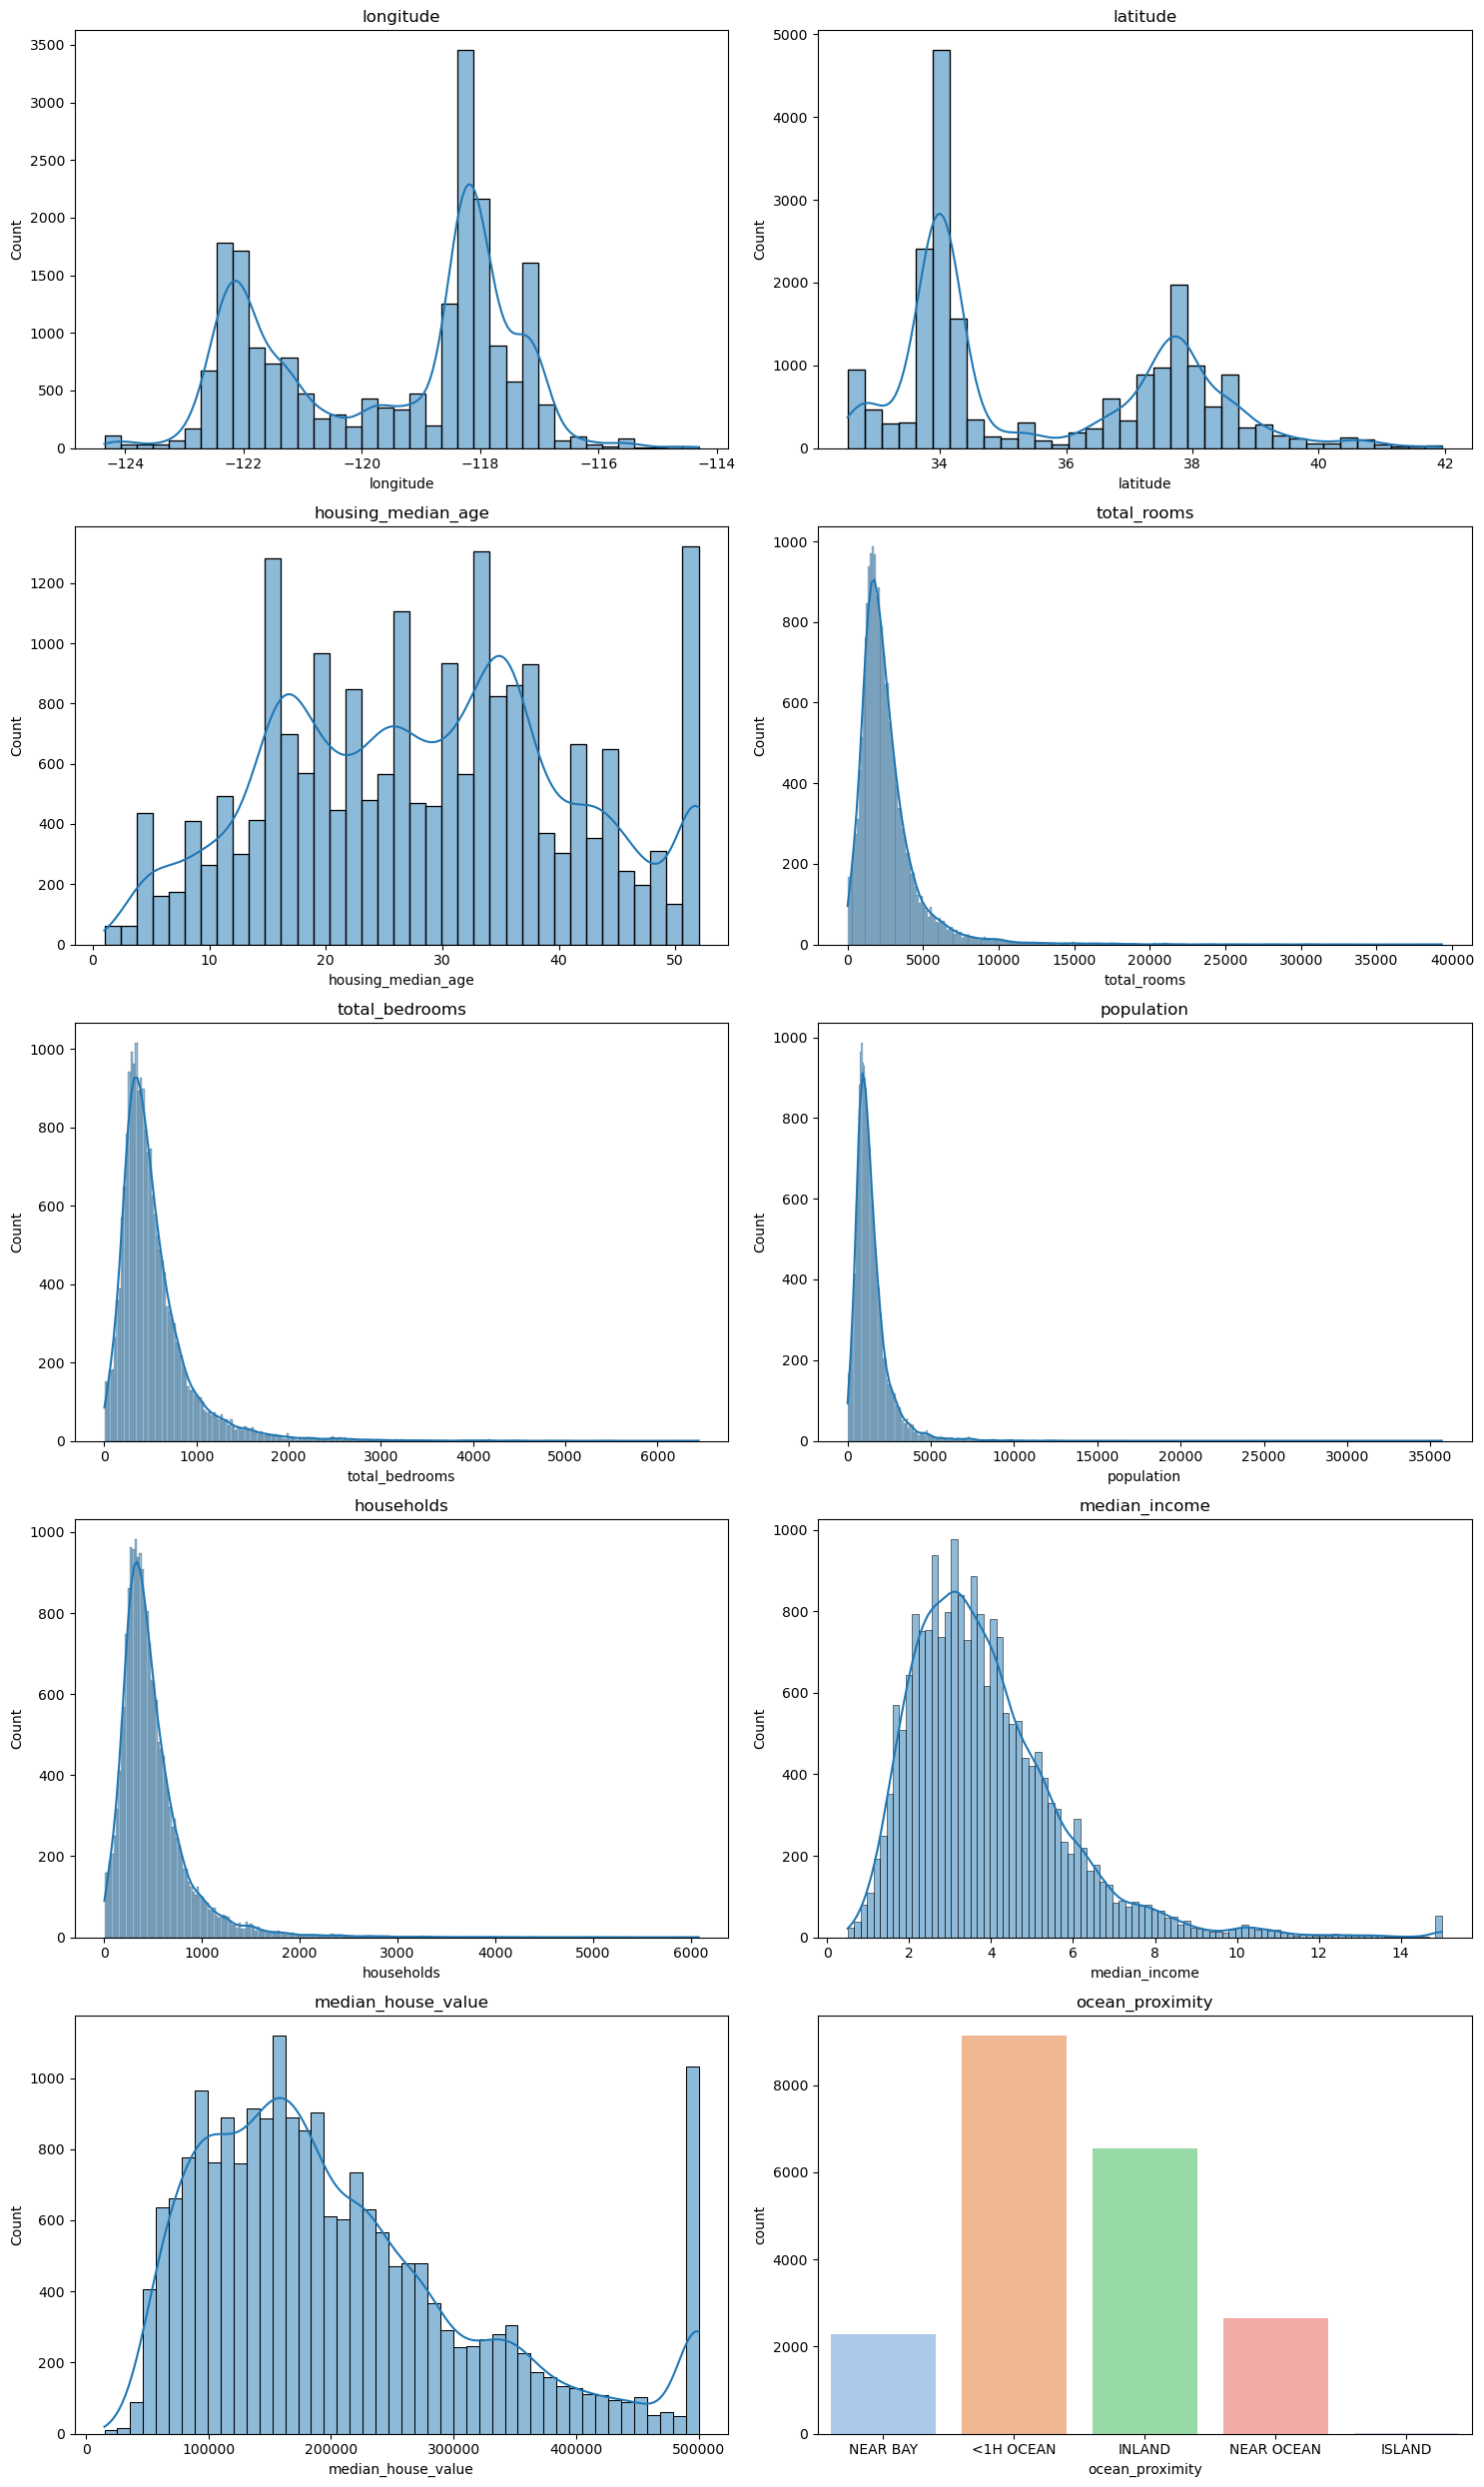

In [86]:
# Get the list of columns with categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Plot histograms for numeric variables and bar plots for categorical variables
fig, axes = plt.subplots(nrows=len(df.columns)//2 + len(df.columns) % 2, ncols=2, figsize=(15, 5 * len(df.columns)//2 + 5 * len(df.columns) % 2))

for i, column in enumerate(df.columns):
    if column in categorical_columns:
        sns.countplot(data=df, x=column, ax=axes[i//2, i%2], palette='pastel')
        axes[i//2, i%2].set_title(column)
    else:
        sns.histplot(data=df, x=column, ax=axes[i//2, i%2], kde=True)
        axes[i//2, i%2].set_title(column)

plt.tight_layout()
plt.show()

In [87]:
class_counts = df['ocean_proximity'].value_counts()
print(class_counts)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [88]:
# Remove ISLAND entries
df = df[df['ocean_proximity'] != 'ISLAND']

In [50]:
df.shape

(20635, 10)

In [51]:
# Check for nulls
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [89]:
df.dropna(inplace=True)

In [53]:
df.shape

(20428, 10)

In [54]:
# Check for duplicates
df.duplicated().sum()

0

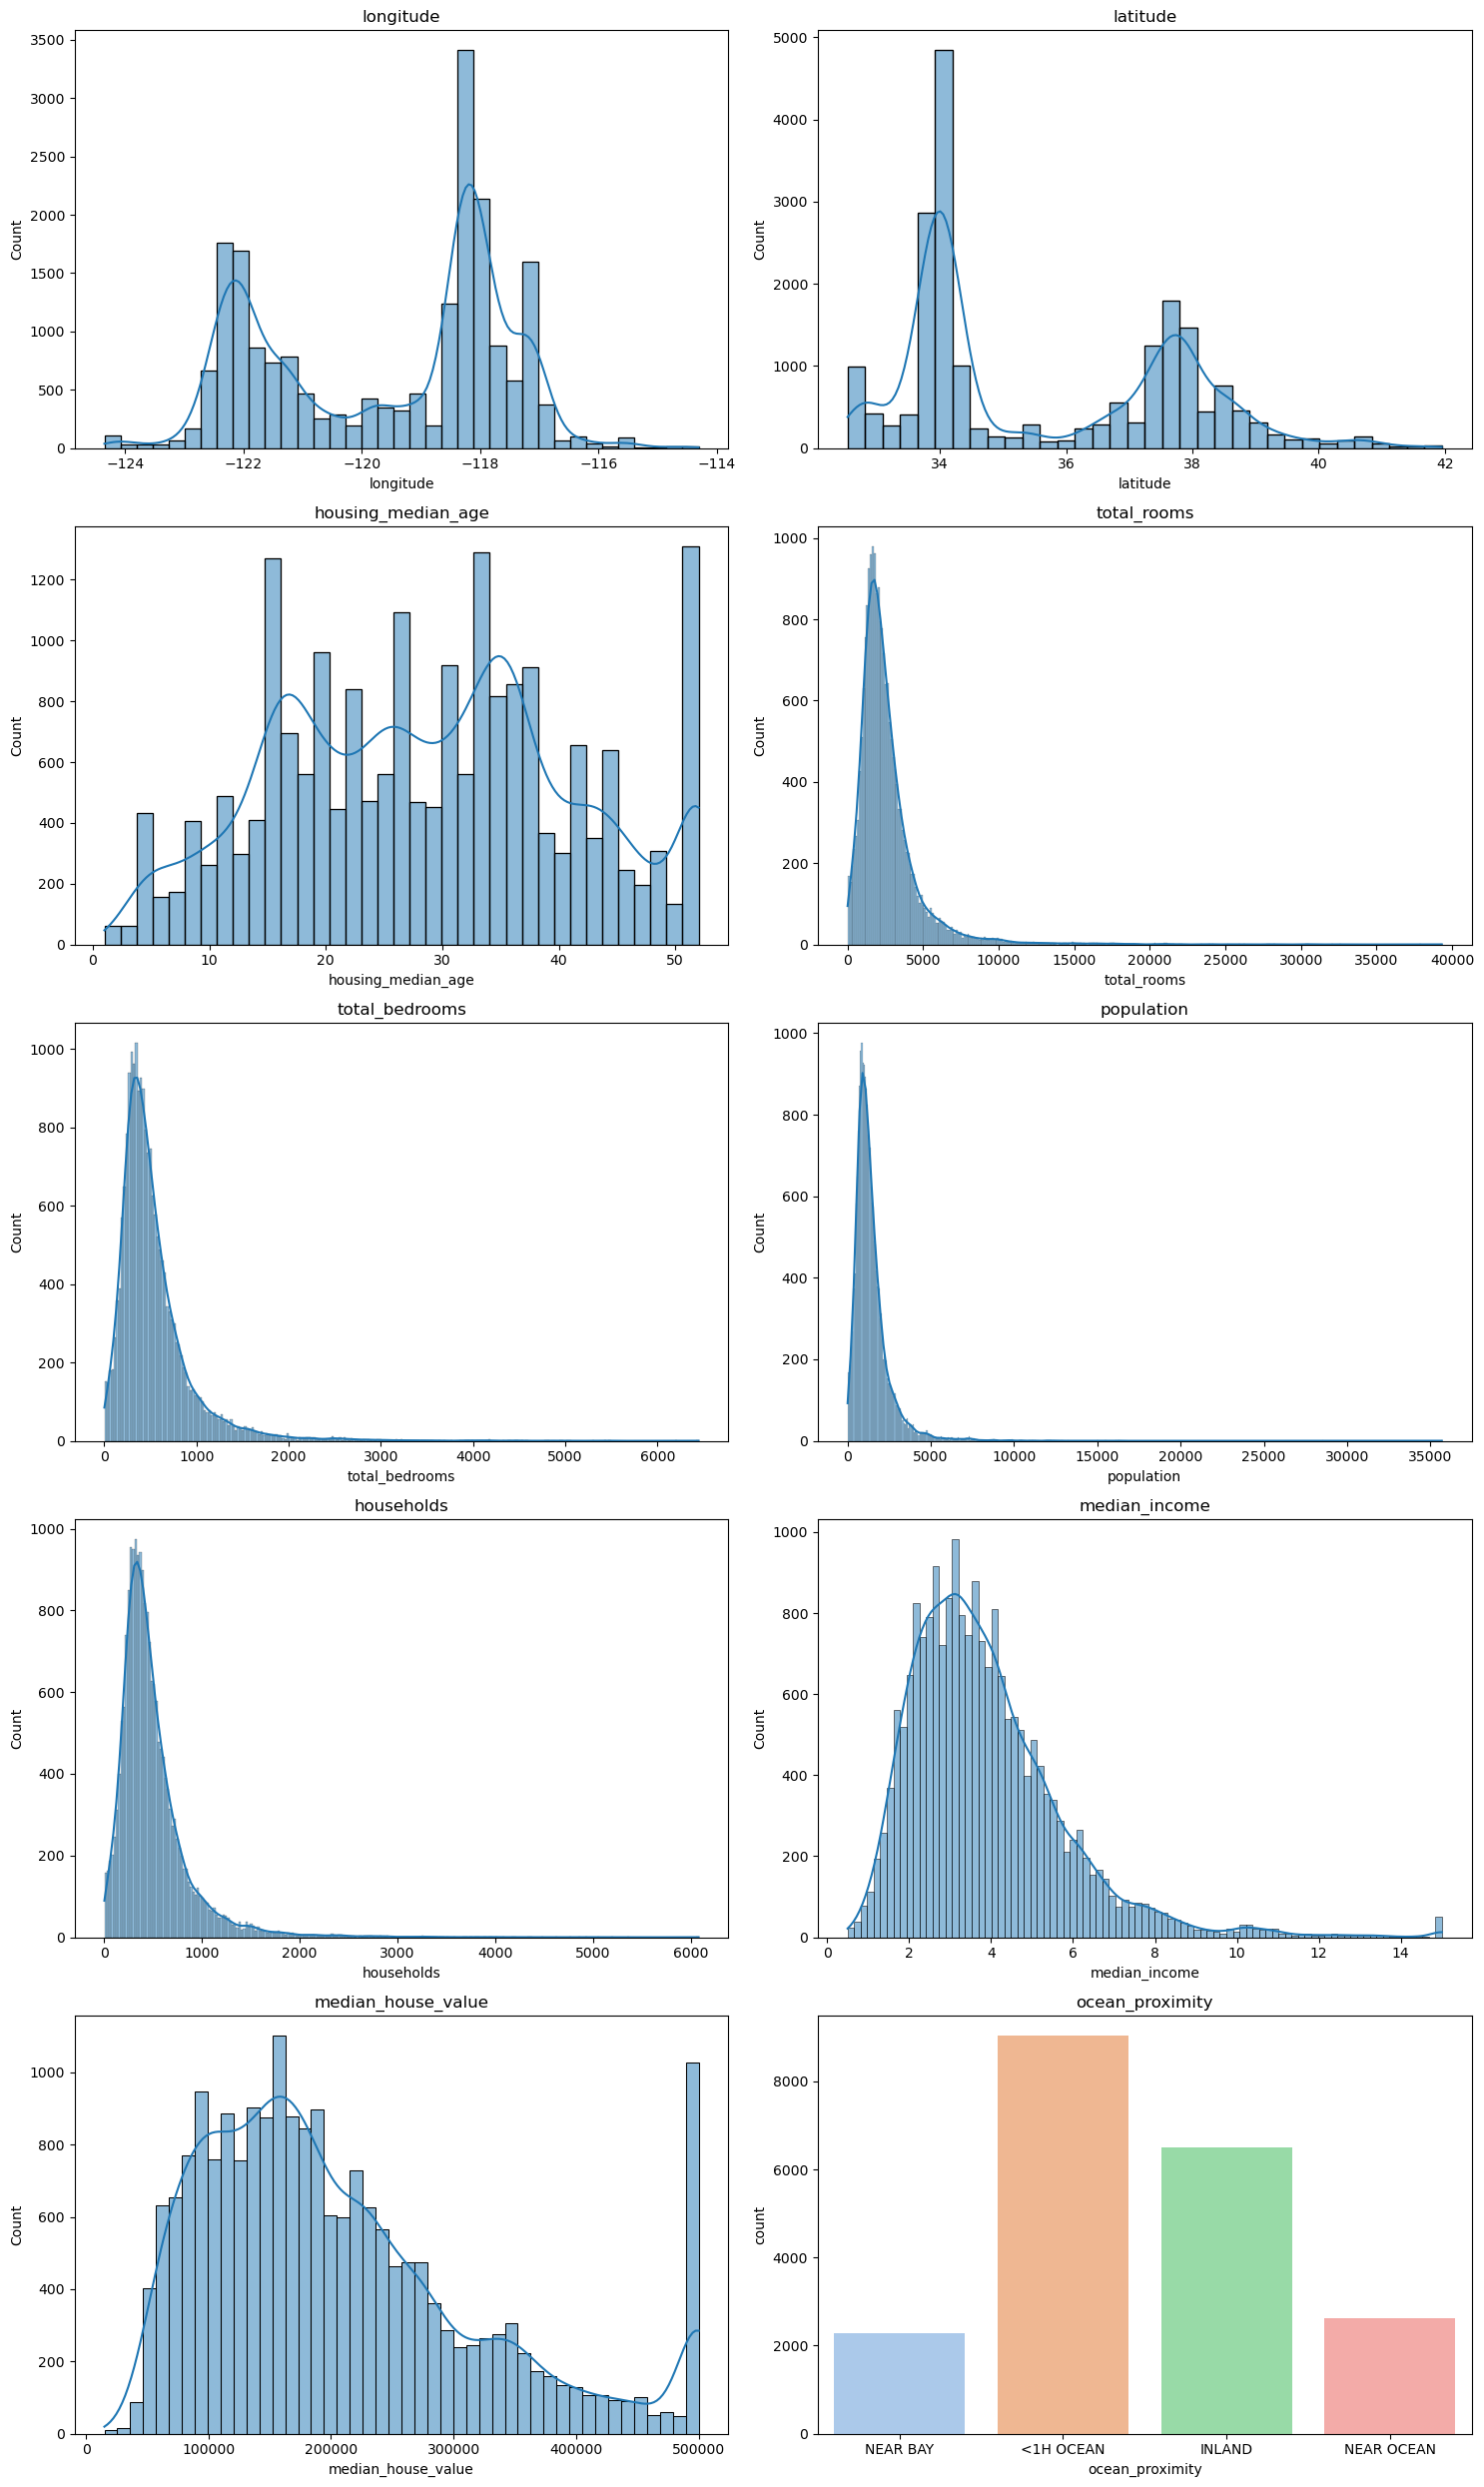

In [90]:
# Get the list of columns with categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Plot histograms for numeric variables and bar plots for categorical variables
fig, axes = plt.subplots(nrows=len(df.columns)//2 + len(df.columns) % 2, ncols=2, figsize=(15, 5 * len(df.columns)//2 + 5 * len(df.columns) % 2))

for i, column in enumerate(df.columns):
    if column in categorical_columns:
        sns.countplot(data=df, x=column, ax=axes[i//2, i%2], palette='pastel')
        axes[i//2, i%2].set_title(column)
    else:
        sns.histplot(data=df, x=column, ax=axes[i//2, i%2], kde=True)
        axes[i//2, i%2].set_title(column)

plt.tight_layout()
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

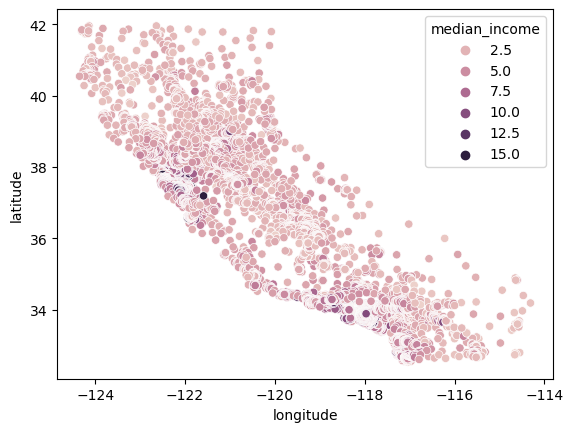

In [100]:
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'median_income')

<Axes: xlabel='longitude', ylabel='latitude'>

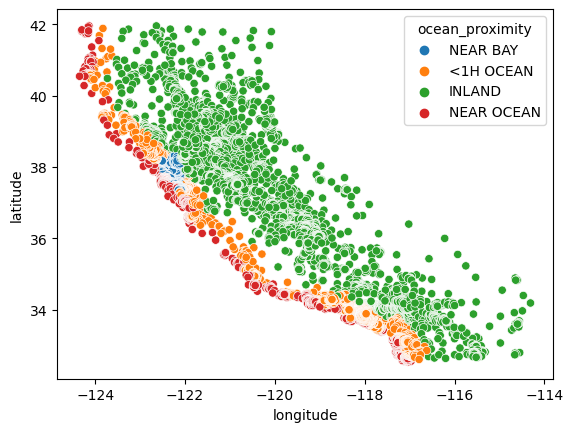

In [91]:
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'ocean_proximity')

<Axes: xlabel='longitude', ylabel='latitude'>

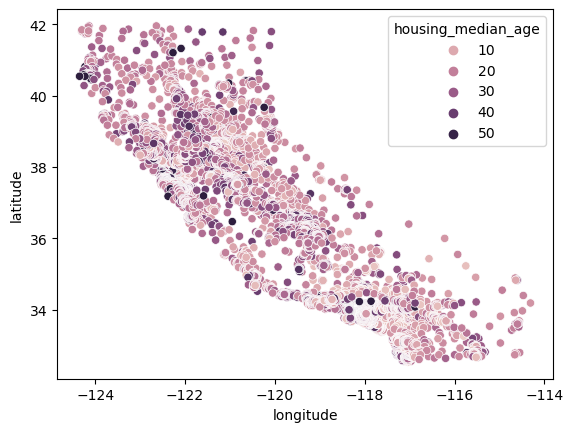

In [92]:
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'housing_median_age')

In [56]:
# Select only the desired columns using loc
df = df.loc[:, ['longitude', 'latitude', 'median_house_value']]

In [57]:
# Duplicates in clustering adds weights to variables so we'll keep them
df.duplicated().sum()

319

## Data Understanding & Visualization

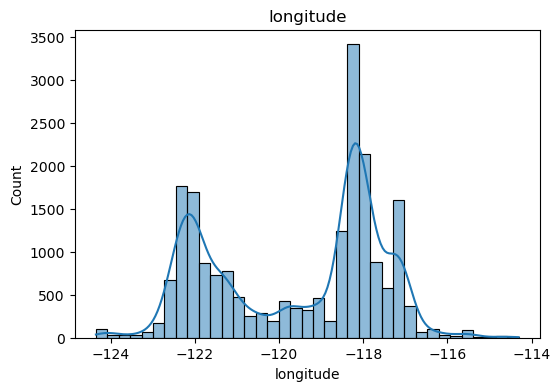

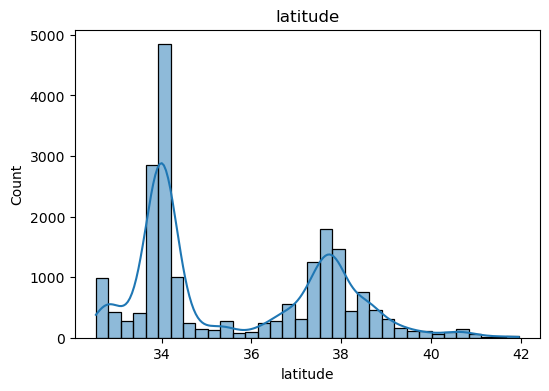

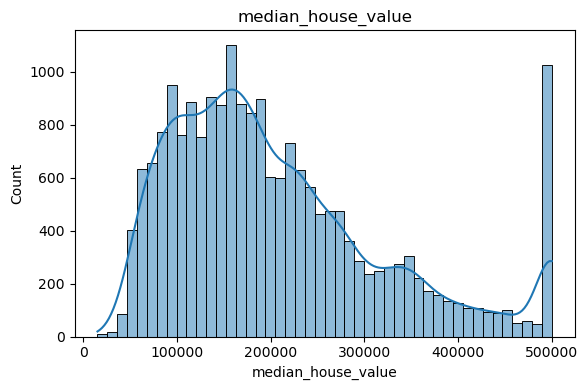

In [58]:
# Distribution of variables
for i, column in enumerate(df.columns):
    plt.figure(figsize=(6, 4))
    ax = sns.histplot(data=df, x=column, kde=True)
    ax.set_title(column)

plt.tight_layout()
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

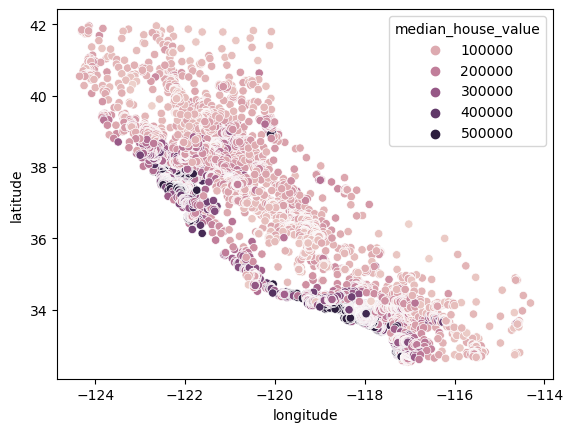

In [59]:
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'median_house_value')

## Modeling

In [60]:
X= df[['longitude', 'latitude']]

In [61]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

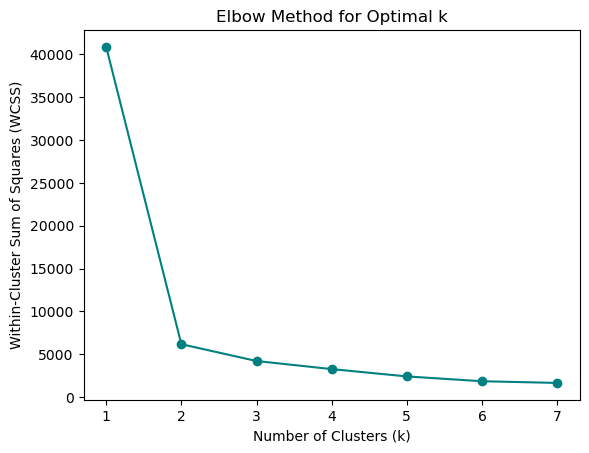

In [62]:
# Initialize a list to store the within-cluster sum of squares (WCSS) for different values of k
wcss = []

# Set the range of k values to try
k_values = range(1, 8)

# Perform K-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each value of k
plt.plot(k_values, wcss, marker='o', linestyle='-', color='teal')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 8, step=1))  # Set x-axis ticks to integer values
plt.show()

In [63]:
# The WCSS value
kmeans.inertia_

1652.6710481019327

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


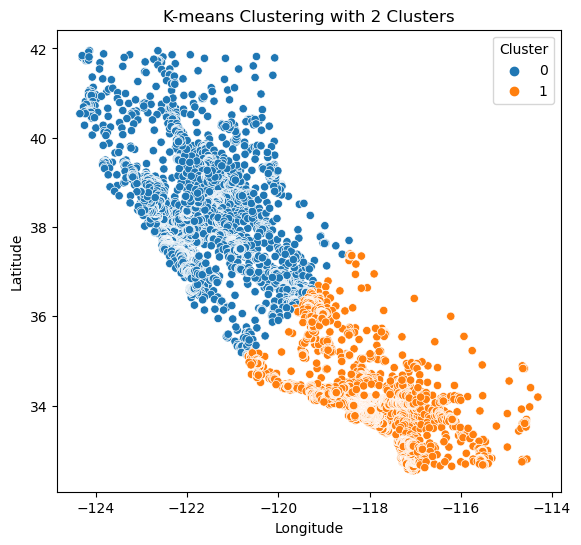

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [102]:
optimal_k=2

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels for the training data
cluster_labels = kmeans.labels_

# Concatenate the original training data with the scaled features
X_with_geo = pd.DataFrame({
    'longitude': X['longitude'],
    'latitude': X['latitude'],
    'longitude_scaled': X_scaled[:, 0],  # Assuming longitude is the first column in X_train_scaled
    'latitude_scaled': X_scaled[:, 1]    # Assuming latitude is the second column in X_train_scaled
})

# Plot the scatterplot with cluster labels
plt.figure(figsize=(6.5, 6))
sns.scatterplot(data=X_with_geo, x='longitude', y='latitude', hue=cluster_labels)
plt.title('K-means Clustering with {} Clusters'.format(optimal_k))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()
X.head()

<Axes: ylabel='median_house_value'>

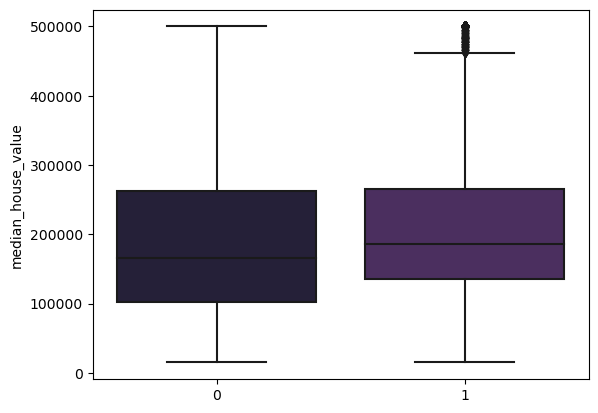

In [103]:
# Define a custom color palette
custom_palette = sns.color_palette('magma', 7, 0.6)

sns.boxplot(x = kmeans.labels_, y = df['median_house_value'], palette=custom_palette)

In [65]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,13):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

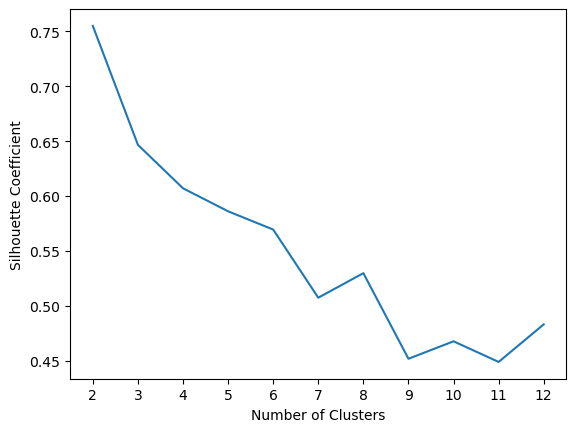

In [66]:
plt.plot(range(2, 13), silhouette_coefficients)
plt.xticks(range(2, 13))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


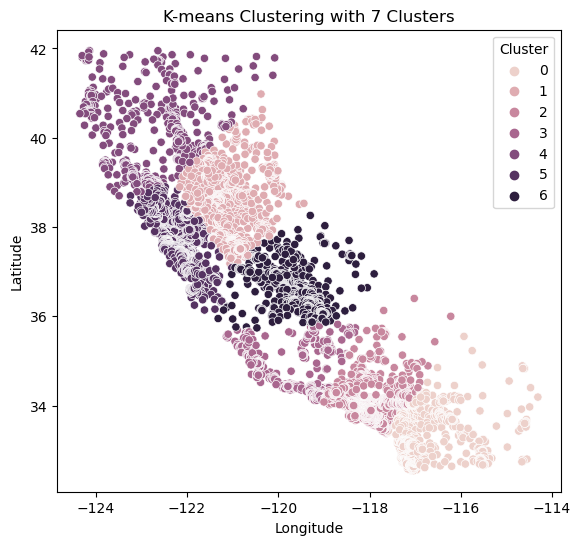

In [73]:

optimal_k=7

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels for the training data
cluster_labels = kmeans.labels_

# Concatenate the original training data with the scaled features
X_with_geo = pd.DataFrame({
    'longitude': X['longitude'],
    'latitude': X['latitude'],
    'longitude_scaled': X_scaled[:, 0],  # Assuming longitude is the first column in X_train_scaled
    'latitude_scaled': X_scaled[:, 1]    # Assuming latitude is the second column in X_train_scaled
})

# Plot the scatterplot with cluster labels
plt.figure(figsize=(6.5, 6))
sns.scatterplot(data=X_with_geo, x='longitude', y='latitude', hue=cluster_labels)
plt.title('K-means Clustering with {} Clusters'.format(optimal_k))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()
#X.head()

<Axes: ylabel='median_house_value'>

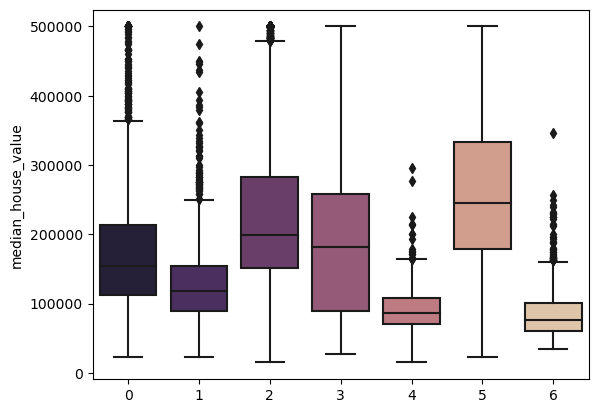

In [77]:
# Define a custom color palette
custom_palette = sns.color_palette('magma', 7, 0.6)

sns.boxplot(x = kmeans.labels_, y = df['median_house_value'], palette=custom_palette)

In [79]:
# The lowest SSE value
kmeans.inertia_

1581.8363774655431

In [78]:
silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
# Not bad

0.5716473442846216